<a href="https://colab.research.google.com/github/AnmolArora15/Gender-Recognition-by-Voice/blob/main/GENDER_RECOGNITION_BY_VOICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<a name = Section1></a>
# **1. Introduction**
---
<img src="https://raw.githubusercontent.com/AnmolArora15/Gender-Recognition-by-Voice/main/image%202.jpeg" width="900" height="200">

Our client for this project is a Telecom company XYZ.

- They are a leading telecom company with 5 million users.
- They want to keep track of the number of male and female users but as the user count increases the task becomes more tedious.
- They want to automate the process of keeping track of male and female users using their voice.
- Their research and development teams are trying to understand the acoustic properties of the voice and speech so that they can   use it to enhance the customer experience in their new product.

---
<a name = Section2></a>
# **2. Problem Statement**
---


<img src="https://raw.githubusercontent.com/AnmolArora15/Gender-Recognition-by-Voice/main/image%201.png" width="900" height="200">


The current process suffers from the following problems:

- The current process is a manual classification of gender using their voice.
- This is very tedious and time-consuming as it needs to be repeated every time a new customer joins.

- The company has hired us as a data science consultant.

- They want to automate the process of predicting the male or female voice using acoustic properties of the voice or speech    rather than doing this manual work.

- Our task is to build a classification model using the dataset.


### **Project Deliverables**
- **Deliverable**: Gender prediction using voice.
- **Machine Learning Task**: Classification
- **Target Variable**: label


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience
!pip install -q pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.6 MB/s eta 0:00:00


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [1]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import confusion_matrix                        # To plot confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech.

- The column label is also present in the dataset which has two values male and female.

- This is the data that we have to predict for future samples.


- The dataset is divided into two parts: Train, and Test sets.

#### **Train Set**:
- The train set contains 2851 rows and 22 columns.
- The last column label is the target variable.

#### **Test Set**:
- The test set contains 317 rows and 21 columns.
- The test set doesn’t contain the label column.
- It needs to be predicted for the test set.


In [114]:
# Load the data
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/AnmolArora15/Gender-Recognition-by-Voice/main/voice_train.csv')

# Get the dimesions of data
print('Shape of the dataset:', data.shape)

# Output first 5 data rows
data.head()

Shape of the dataset: (2851, 22)


,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,0.426868,0.195134,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,0.459881,0.171014,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,0.413620,0.129191,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,0.398674,0.222698,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,0.337921,0.196000,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

**Observations**
- We have 2851 Rows of observations and 22 Columns across
- label is our **Target feature**
- Id is unique
- dtype of all the features looks fine
- No missing value in our Dataset.

<a name = Section42></a>
### **4.2 Data Description**

In [ ]:
data.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,0.408473,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,0.176880,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,0.259191,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,0.396548,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,0.533495,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


**Observations**
- Avg. mean frequency for both Male and Females are 0.18 with a SD of 0.02
- min meanfreq is 0.039363 and maximum is 0.251124
- **skew** column looks highly skewed with min skewness of 0.14 and max 34.
- **kurt** also looks highly skewed wit mean 35 median 8.25 and max 1309.61.
- **maxdom** and **dfrange** is also highly skewed.
- We will see the distribution in EDA.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

In [ ]:
#Lets check for any null values in our Dataset

In [ ]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

**Observations**
- We dont have any Null values in our Dataset
- Also check for any Duplicated Row

In [ ]:
data.duplicated().sum()

0

In [ ]:
data[data.duplicated()==True]

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label


<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
#profile = ProfileReport(df=data)
#profile.to_file(output_file='Pre Profiling Report.html')
#print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [ ]:
#profile = data.profile_report(title = "Pandas Profiling Report")
#profile

In [ ]:
#If you want to see the pandas profiling report uncomment and Rerun the Above Cell's

**Observations**
- No missing value in our Dataset
- skew is highly overall correlated with kurt
- minfun is highly overall correlated with meandom
- for more you can check the report.


In [ ]:
data["label"].value_counts()

female    1432
male      1419
Name: label, dtype: int64

In [ ]:
#Lets drop the ID Column and lets do some EDA

In [115]:
data.drop('Id',axis=1,inplace=True)

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**

In [ ]:
#Lets do some Exploratory Data Analysis to have a better understanding of the features and co-relations among different features

In [ ]:
#Lets see the co-relation among different features

In [ ]:
#I have potted a heatmap

<AxesSubplot:>

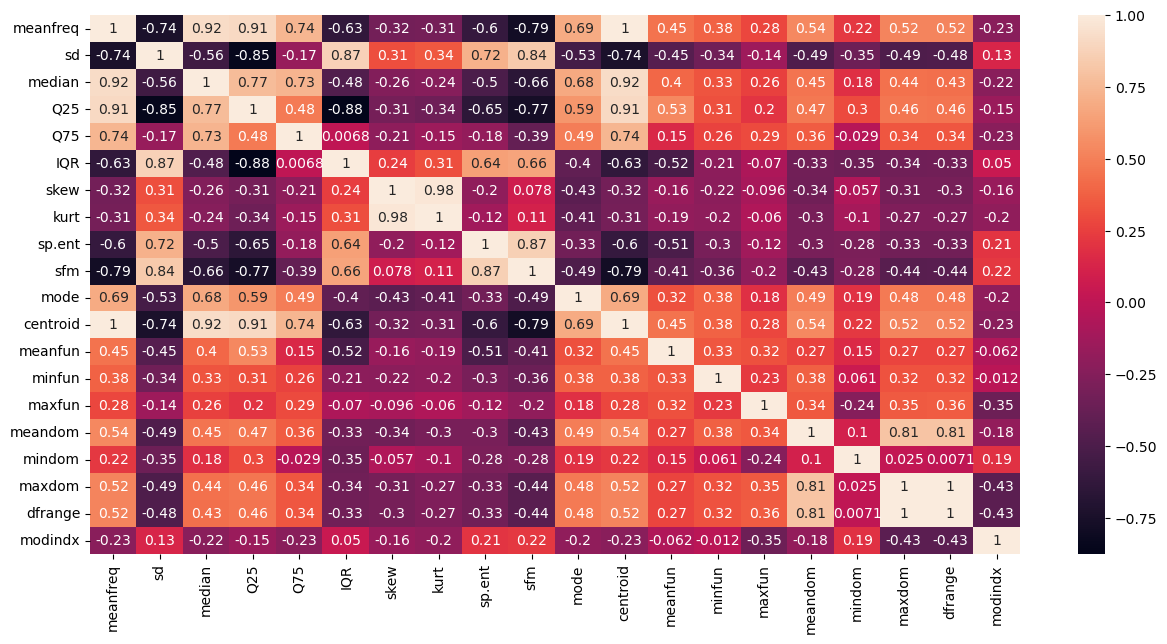

In [ ]:
paper = plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

**Observations**
- We can see few features have are very high positive neagtive co-relations among them.

> Few common observations are -

- skew and kurt are highly co-related.They have a co-relation of 0.98(almost 1)
- meanfreq and median are positively co-related.
- mean freq is also highly co-related with feature Q25.
- Q25 and IQR are high negatively co-related.
- Q25 and sd are high negatively co-related.



In [ ]:
#Lets do some uni-variate Analysis

**Question**: What is the Distribution of Spectral Flatness(sfm) of the voice sample ?

In [ ]:
#Lets plot a histogram to see the distribution

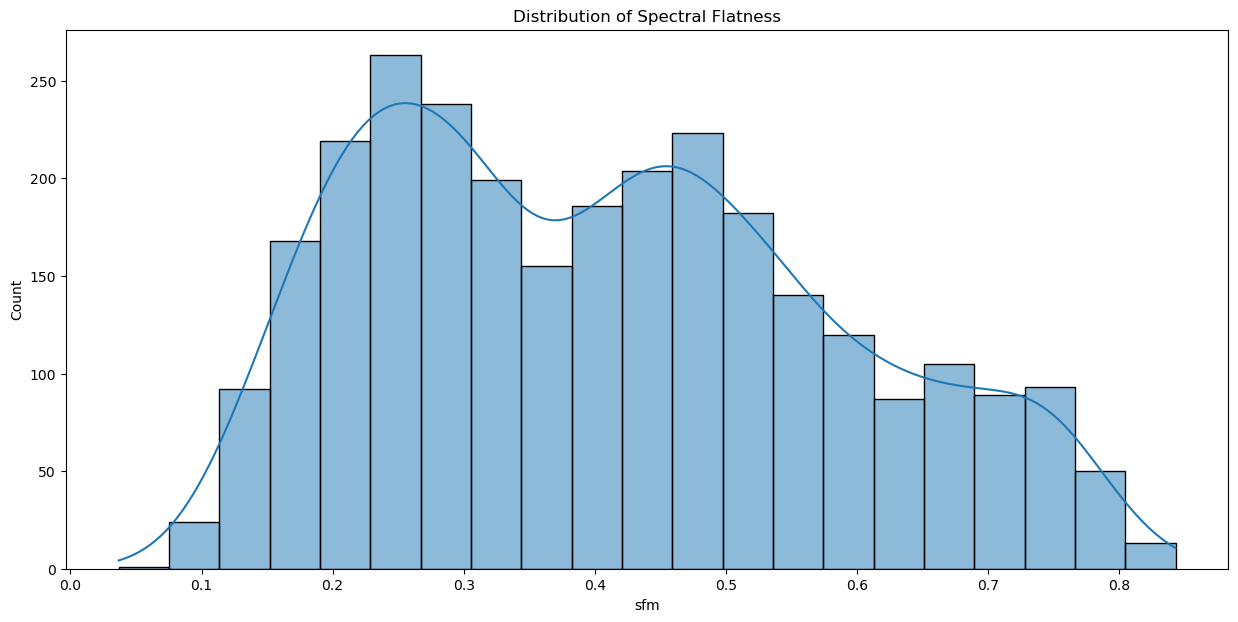

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(data['sfm'],kde=True)
plt.title("Distribution of Spectral Flatness")
plt.show()

**Observations**
- Spectral Flatness is fairly Normally Distributed.

**Question**:What is the distribution of "Average of fundamental frequency measured across the acoustic signal"(meanfun)

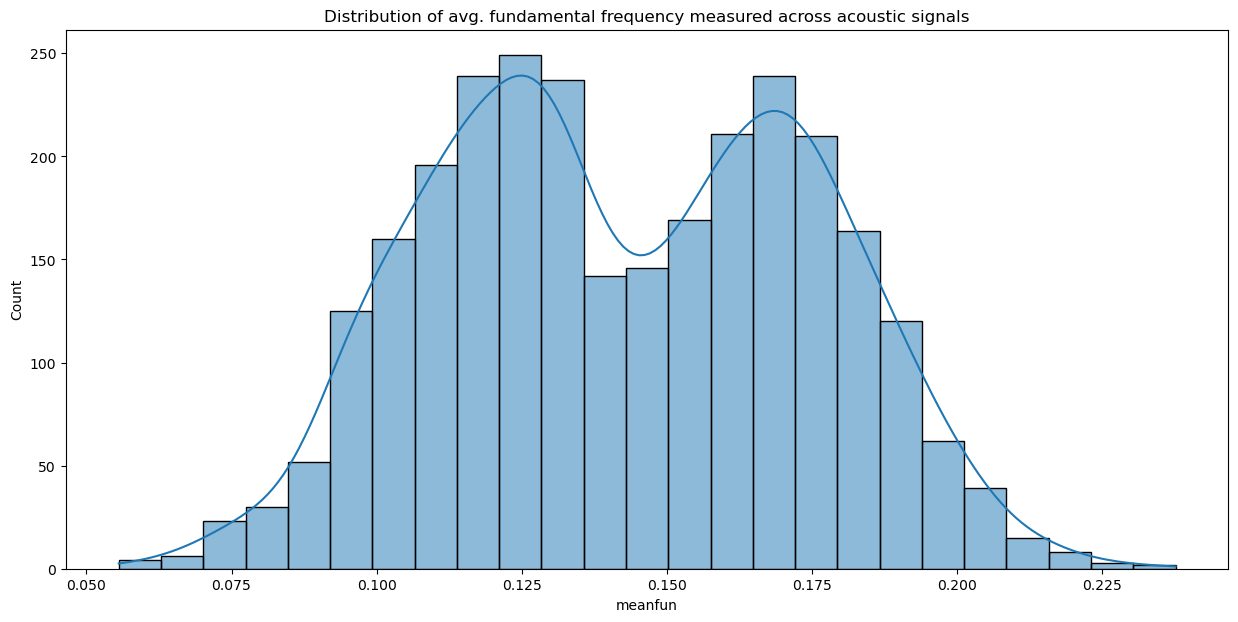

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(data.meanfun,kde=True)
plt.title("Distribution of avg. fundamental frequency measured across acoustic signals")
plt.show()

**Question**: How is Male/Female distributed in our Dataset?

In [ ]:
data['label'].value_counts()

female    1432
male      1419
Name: label, dtype: int64

In [ ]:
#Lets plot a pie Chart

<AxesSubplot:ylabel='label'>

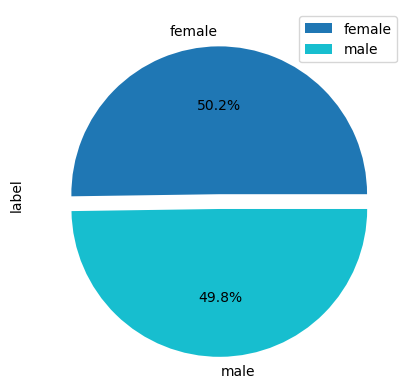

In [ ]:
data['label'].value_counts().plot.pie(autopct='%3.1f%%',legend=True,explode=[0,0.1],cmap='tab10')

**Observations**
- Our dataset exhibits a nearly **equal distribution of male and female samples**, making it well-balanced for gender recognition.
- This balance ensures that our machine learning model is not skewed towards one gender, which is essential for fair and accurate gender predictions.

**Question**: Do we have any feature with very high skewness ?

In [ ]:
data.skew()

meanfreq   -0.608137
sd          0.145654
median     -1.015778
Q25        -0.495925
Q75        -0.821695
IQR         0.299418
skew        4.946760
kurt        5.881449
sp.ent     -0.429966
sfm         0.350951
mode       -0.839555
centroid   -0.608137
meanfun     0.032909
minfun      1.916373
maxfun     -2.215242
meandom     0.610751
mindom      1.683842
maxdom      0.738665
dfrange     0.740749
modindx     2.075593
dtype: float64

**Observations**:
- We can see features have very high skewness.
- skew and kurt have high skewness.
- Few features are negatively skewed.
- Lets see few of them.

In [ ]:
# I have defined a function to see if a feature has an Outlier
# I have plotted a Box-plot and Distplot

In [ ]:
def plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
    sns.boxplot(data=data, x=col, ax=axes[0])
    sns.distplot(a=data[col], ax=axes[1], color='#ff4125')
    plt.show()

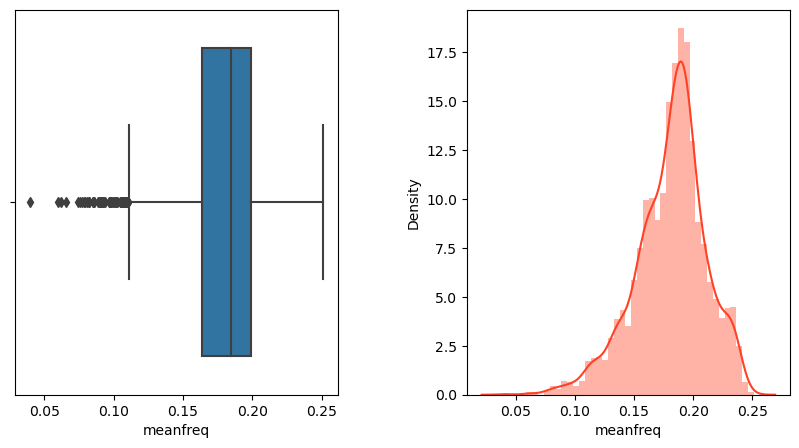

In [ ]:
plot('meanfreq')

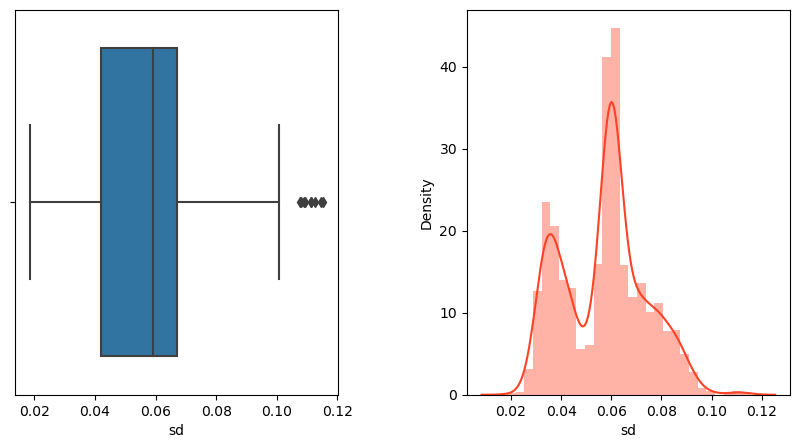

In [ ]:
plot('sd')

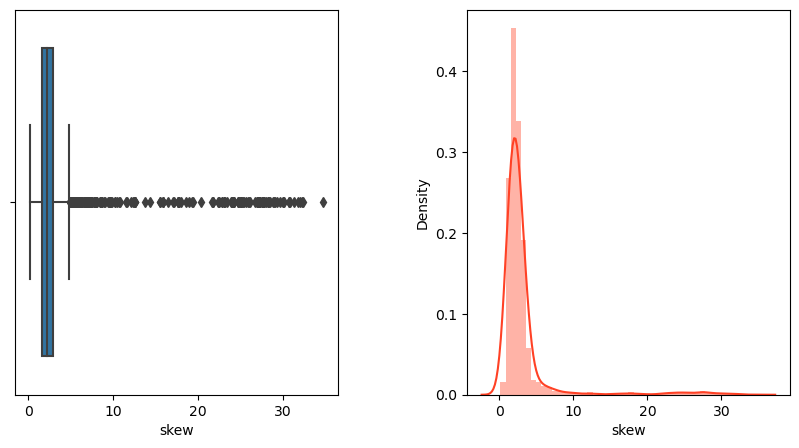

In [ ]:
plot('skew')

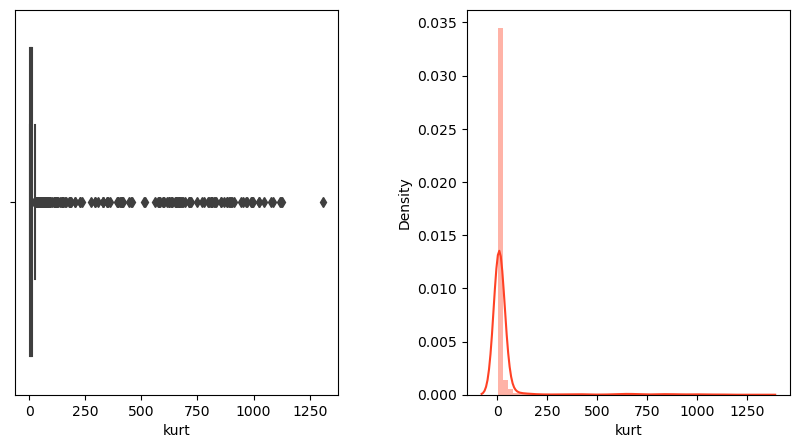

In [ ]:
plot('kurt')

In [ ]:
#Similarly,we can see for each feature

**Observations**
- A lot of features can be seen to have potential Outliers.
- Lets do some Bi-variate analysis for better understanding.

In [ ]:
#Lets do some bi-variate Analysis

In [ ]:
#Lets define a function for some bi-variate analysis

In [ ]:
def visualize_feature_distribution(feature_name):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x='label', y=feature_name)
    plt.title(f"Distribution of {feature_name} by Gender")
    plt.xlabel('Gender')
    plt.ylabel(feature_name)
    plt.show()

**Question**: Is there a statistically significant difference in the mean fundamental frequency (meanfreq) between male and female voice samples in our dataset?

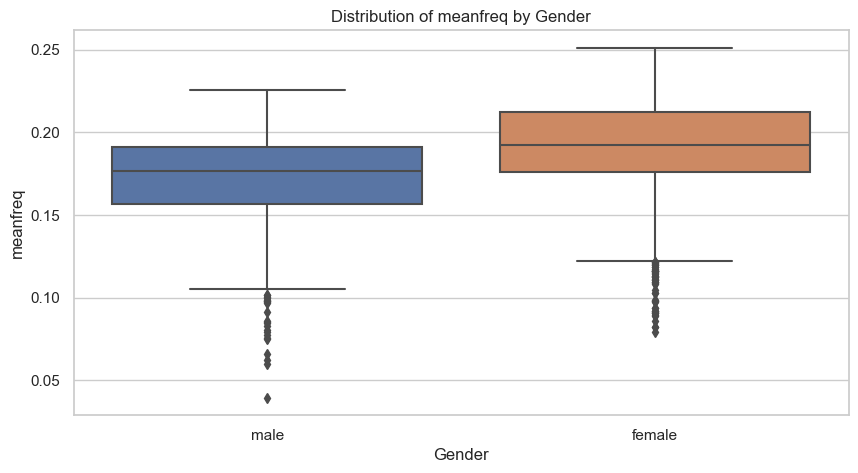

In [ ]:
visualize_feature_distribution('meanfreq')

> Lets see with other features as well

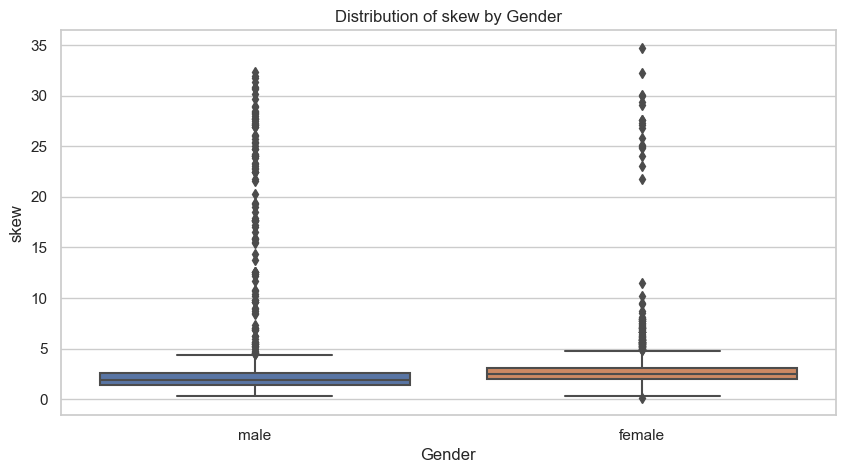

In [ ]:
visualize_feature_distribution('skew')

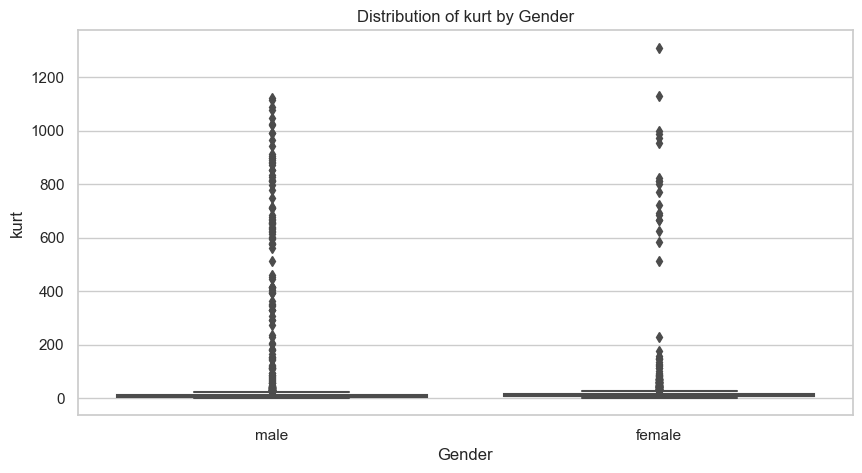

In [ ]:
visualize_feature_distribution('kurt')

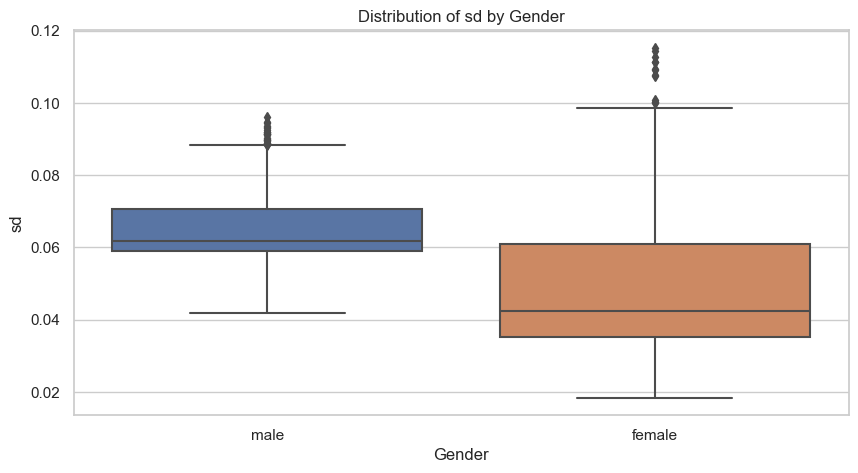

In [ ]:
visualize_feature_distribution('sd')

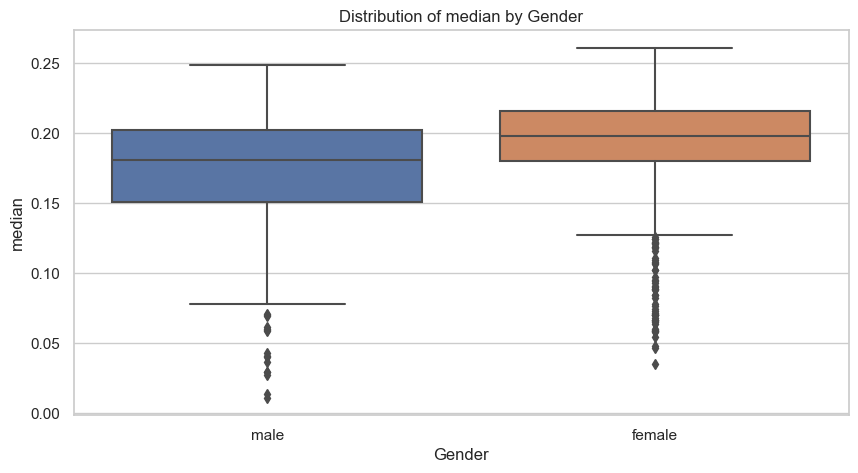

In [ ]:
visualize_feature_distribution('median')

<a name = Section7></a>

---
# **7. Data Preparation**
---


In [113]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,0.426868,0.195134,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,0.459881,0.171014,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,0.413620,0.129191,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,0.398674,0.222698,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,0.337921,0.196000,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female


In [4]:
# We have out Output variable as Categorical type

In [5]:
#Lets replace Females with 1 and Males with 0

In [116]:
data["label"] = data["label"].replace({"female": 1, "male": 0})

In [117]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,0.426868,0.195134,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,0
1,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,0.459881,0.171014,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,1
2,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,0.413620,0.129191,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,0
3,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,0.398674,0.222698,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,0
4,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,0.337921,0.196000,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,1


<a name = Section71></a>
### **7.1 Data Scaling**

- In this section, we will scale our features to ensure that it one feature doesn't have more impact than others in terms of weights.

In [8]:
#Before scaling lets devide our Data into X and y

In [118]:
X = data.drop('label',axis=1)
y = data['label'].values

In [119]:
print(X.shape)
print(y.shape)

(2851, 20)
(2851,)


In [11]:
#Lets use Standard Scaler to bring all the features on the same scale

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
sc = StandardScaler()

In [122]:
scaled_X = pd.DataFrame(data=sc.fit_transform(X), columns=X.columns)

In [123]:
scaled_X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-0.623883,0.064103,-0.322299,-0.825262,-1.200534,0.278687,-0.238108,-0.213025,0.585461,0.104014,0.385583,-0.623883,-1.461487,-1.047004,-0.794390,-0.813695,-0.091453,-0.451378,-0.449873,-0.155605
1,-0.646844,0.017576,-0.430875,0.353223,-1.778436,-1.380490,0.924906,0.191463,-0.556019,0.290687,0.071948,-0.646844,0.639881,-1.107138,-1.841760,-0.453776,1.878085,-0.310942,-0.344585,0.294196
2,-0.524738,0.286272,-1.400411,-0.450036,0.018980,0.522622,-0.116888,-0.176391,0.526612,0.029103,-0.471882,-0.524738,-0.709662,-0.091068,-1.233032,-0.713700,0.559890,-1.151617,-1.161949,2.393624
3,0.240925,-0.084888,0.561433,-0.202709,0.201657,0.341651,-0.379550,-0.233339,0.424534,-0.055412,0.744003,0.240925,-1.069463,-0.809712,-3.809057,-0.647757,1.149201,-0.096827,-0.117386,-0.575439
4,0.220689,-0.778880,0.120239,0.338375,-0.395440,-0.602670,-0.352003,-0.228060,0.271625,-0.398937,0.396848,0.220689,0.361579,0.599828,0.674551,0.532652,-0.463650,1.046601,1.055184,-0.593074


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop different model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Precision**, **Recall**,**f1 scores**and **Accuracy** scores.

In [17]:
#Lets split our dependent and independent variables into training and testing dataset for further development.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=123)

In [125]:
# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2280, 20)
y_train shape:  (2280,)
X_test shape:  (571, 20)
y_test shape:  (571,)


In [58]:
#Lets define a function for evaluation purpose

In [126]:
def model_evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    train_score = model.score(X_train,y_train)
    print("Accuracy: ", accuracy)

    cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
    plt.show()

    return {'Test score' : accuracy,
            'Train score' : train_score}

<a name = Section81></a>
### **8.1 Logistic Regrerssion**

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
lr = LogisticRegression()

Accuracy:  0.9807355516637478


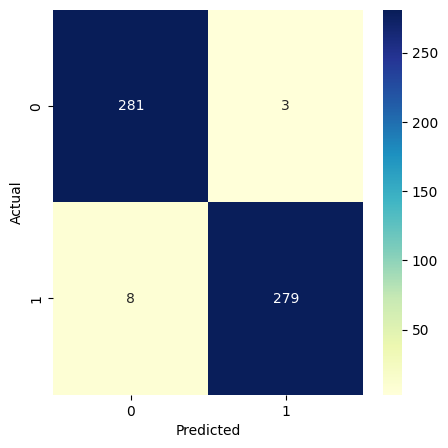

{'Test score': 0.9807355516637478, 'Train score': 0.9728070175438597}

In [129]:
model_evaluation(lr)

<a name = Section82></a>
### **8.2 Decision Tree**

In [130]:
dtree = DecisionTreeClassifier(random_state=123)


Accuracy:  0.9772329246935202


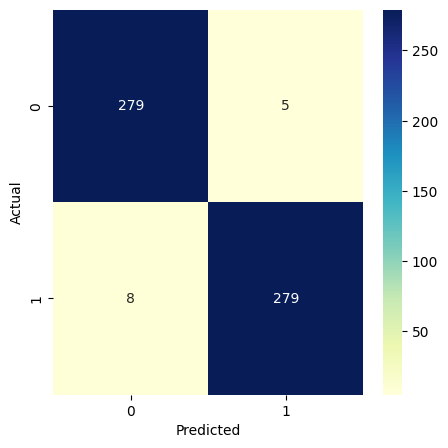

{'Test score': 0.9772329246935202, 'Train score': 1.0}

In [131]:
model_evaluation(dtree)

In [190]:
#We can also see the splits

In [132]:
from sklearn.tree import export_graphviz
import pydotplus                                                    # To generate pydot file
from IPython.display import Image

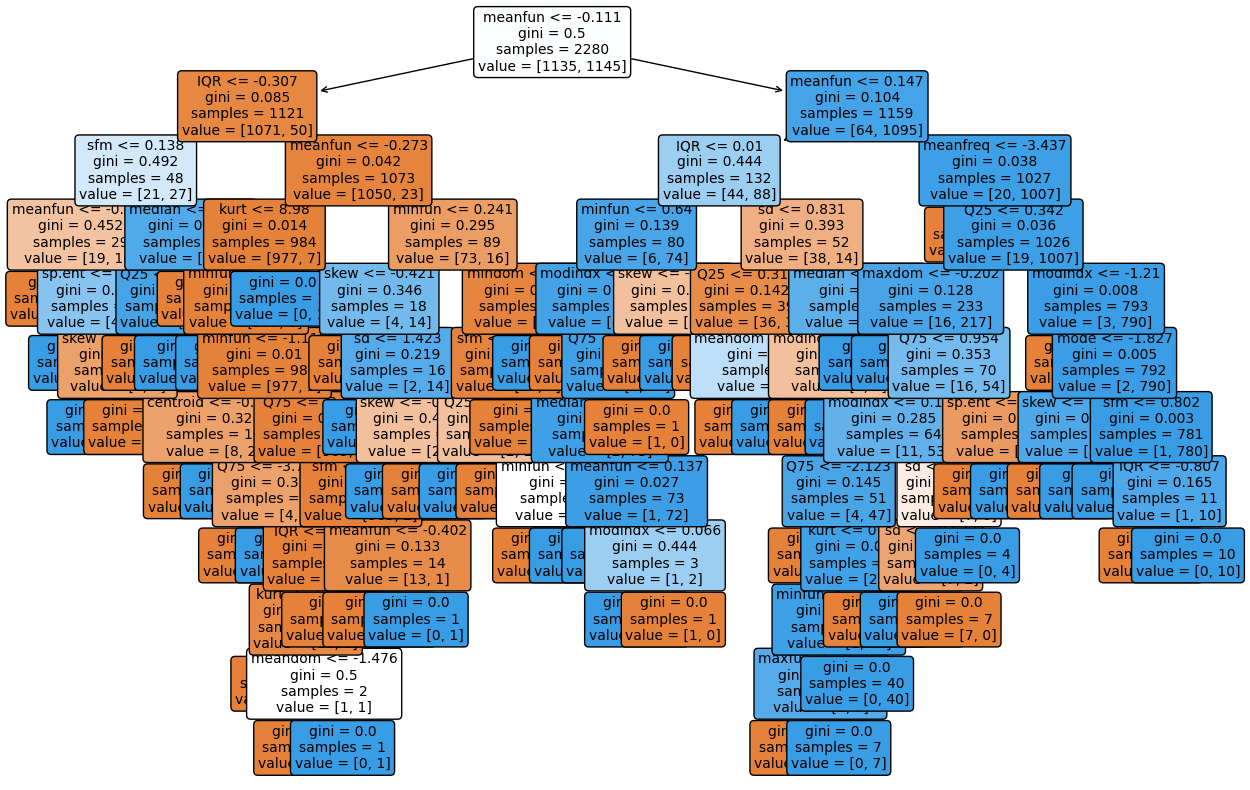

In [133]:
from sklearn.tree import plot_tree
# Visualize the decision tree splits
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

<a name = Section82></a>
### **8.3 Random Forest**

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
rf = RandomForestClassifier(random_state=123)

Accuracy:  0.9842381786339754


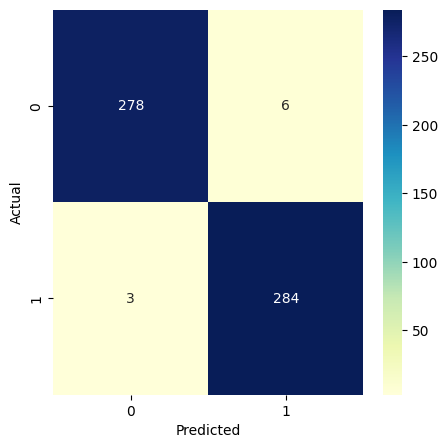

{'Test score': 0.9842381786339754, 'Train score': 1.0}

In [184]:
model_evaluation(rf)

**Observations**-
- We can see how the 3 models are performing.
- All the three models gives Good Accuracy and Precision and Recall(FP and FN)
- Based on the bias Variance trade off we can consider Random Forest as our Base Model.
- We can further try to improve the Accuracy by reducing the Dimensions. LEts try and use **Principal Component Analysis(PCA)**
- Lets apply PCA with Random Forest.

# **PCA**

In [172]:
scaled_X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-0.623883,0.064103,-0.322299,-0.825262,-1.200534,0.278687,-0.238108,-0.213025,0.585461,0.104014,0.385583,-0.623883,-1.461487,-1.047004,-0.794390,-0.813695,-0.091453,-0.451378,-0.449873,-0.155605
1,-0.646844,0.017576,-0.430875,0.353223,-1.778436,-1.380490,0.924906,0.191463,-0.556019,0.290687,0.071948,-0.646844,0.639881,-1.107138,-1.841760,-0.453776,1.878085,-0.310942,-0.344585,0.294196
2,-0.524738,0.286272,-1.400411,-0.450036,0.018980,0.522622,-0.116888,-0.176391,0.526612,0.029103,-0.471882,-0.524738,-0.709662,-0.091068,-1.233032,-0.713700,0.559890,-1.151617,-1.161949,2.393624
3,0.240925,-0.084888,0.561433,-0.202709,0.201657,0.341651,-0.379550,-0.233339,0.424534,-0.055412,0.744003,0.240925,-1.069463,-0.809712,-3.809057,-0.647757,1.149201,-0.096827,-0.117386,-0.575439
4,0.220689,-0.778880,0.120239,0.338375,-0.395440,-0.602670,-0.352003,-0.228060,0.271625,-0.398937,0.396848,0.220689,0.361579,0.599828,0.674551,0.532652,-0.463650,1.046601,1.055184,-0.593074


In [185]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_pca = pd.DataFrame(pca.fit_transform(scaled_X))

In [186]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,1.957769,0.043342,-0.714756,0.197277,-1.113623,-0.935395,-0.710186,-0.671654,-0.408710,-0.679865
1,0.897842,2.696824,-1.109853,1.633738,-1.148656,-0.318901,0.939444,-0.681125,1.060278,-0.349144
2,2.405884,0.988865,-2.073455,-0.585459,-0.344712,1.047269,-0.324377,0.932031,-0.267950,-0.018550
3,0.393529,0.781224,-1.380579,-0.959864,-3.348060,-0.189819,-0.811670,-1.300468,1.446757,0.610137
4,-1.637354,-0.910467,0.338296,1.185453,0.366552,-0.232722,-0.343258,-0.218178,-0.073993,-0.180596


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=123)

Accuracy:  0.9929947460595446


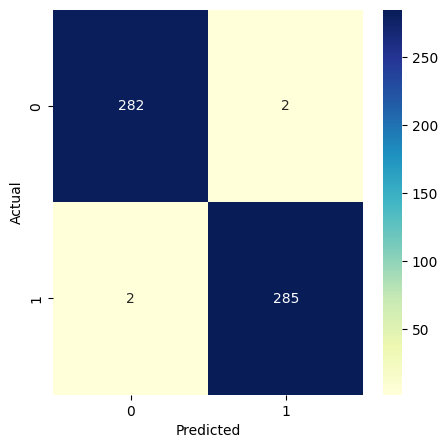

{'Test score': 0.9929947460595446, 'Train score': 1.0}

In [188]:
model_evaluation(rf)

**Observations**-
- Wow..!! Our Model Accuracy on Test Data has Increses.
- Also we can see **FN and FP** Rates have significantly imporved.
- Lets Finalize this model for our Problem.


In [189]:
#Lets see how our model performs on real test Dataset.

<a name = Section9></a>

---
# **9. Model Deployment on Real Test Dataset**
---

In [ ]:
#Lets see our test dataset

In [ ]:
# Load the data
test = pd.read_csv(filepath_or_buffer=('https://raw.githubusercontent.com/AnmolArora15/Gender-Recognition-by-Voice/main/voice_test.csv'))

# Get the dimesions of data
print('Shape of the test dataset:', test.shape)

# Output first 5 data rows
test.head()

Shape of the test dataset: (317, 21)


,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,2148,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,0.159883,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929
1,1124,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,0.374225,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712
2,170,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,0.781729,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396
3,3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503
4,2229,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,0.271880,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644


In [ ]:
sc_test = StandardScaler()
test_scaled = pd.DataFrame(sc_test.fit_transform(test),columns = test.columns)
from sklearn.decomposition import PCA
pca_test = PCA(n_components = 10)
test_pca = pd.DataFrame(pca.fit_transform(test_scaled))

In [ ]:
predictions = rf.predict(test_pca)
pred_test = pd.DataFrame(predictions)
pred_test = pred_test.rename(columns = {0:'Predictions'})
pred_test.head()

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


,Predictions
0,0
1,1
2,0
3,0
4,1


In [ ]:
combine = pd.concat([test_pca,pred_test],axis=1)
combine.head()

,0,1,2,3,4,5,6,7,8,9,Predictions
0,-1.142568,-2.480169,0.942370,0.530098,-1.608835,-1.918598,1.134735,0.437437,-0.322418,-0.476108,0
1,-0.637338,1.867626,0.012677,-0.119879,0.295284,0.298667,0.454774,0.029495,0.422524,0.785216,1
2,3.683498,2.255309,-1.312699,-0.158034,0.253282,0.880873,-1.322417,0.165951,1.348310,-0.329953,0
3,-0.620827,-0.958369,0.073219,0.898135,-1.376920,-1.048903,-0.315517,0.526813,-0.408095,-0.325725,0
4,-3.694460,0.651569,0.199475,1.069531,1.400380,0.377126,-0.517622,-1.355951,0.216486,-0.083967,1


In [ ]:
combine2 = pd.concat([test,pred_test],axis=1)
combine2.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Predictions
0,2148,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,0.159883,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929,0
1,1124,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,0.374225,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712,1
2,170,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,0.781729,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396,0
3,3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503,0
4,2229,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,0.271880,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644,1


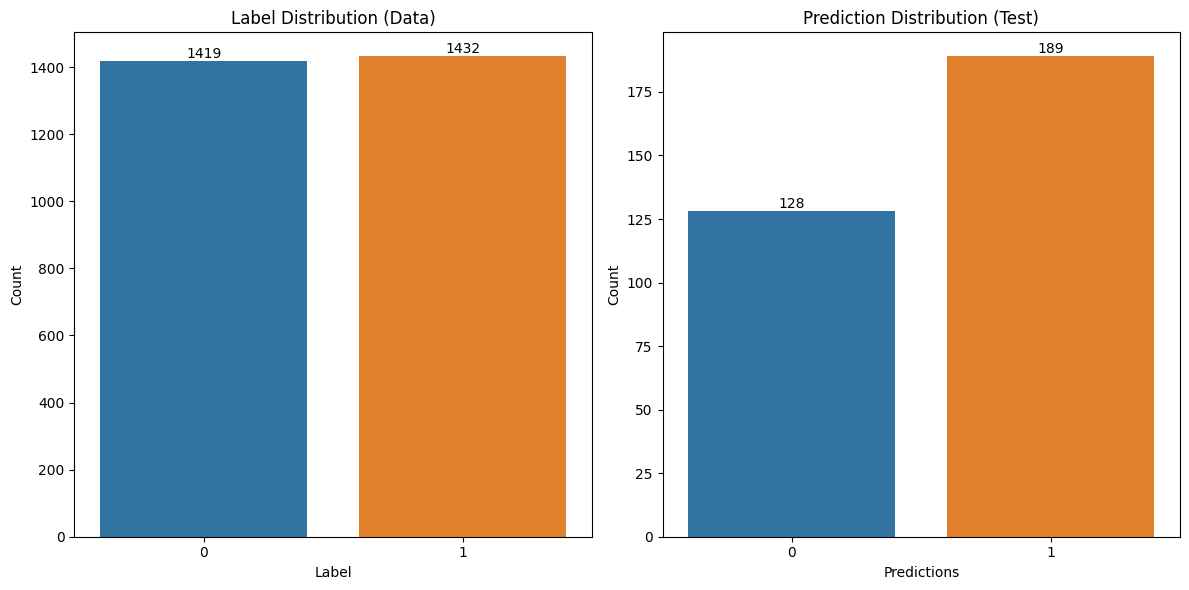

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(1,2,1)
ax1 = sns.countplot(data,x = 'label')
ax1.bar_label(ax1.containers[0])
plt.title('Label Distribution (Data)')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1,2,2)
ax2 = sns.countplot(combine2,x = 'Predictions')
ax2.bar_label(ax2.containers[0])
plt.title('Prediction Distribution (Test)')
plt.xlabel('Predictions')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
combine2.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Predictions
0,2148,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,0.159883,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929,0
1,1124,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,0.374225,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712,1
2,170,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,0.781729,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396,0
3,3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503,0
4,2229,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,0.271880,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644,1


In [ ]:
submission_df = combine2[['Id','Predictions']]

In [ ]:
print(submission_df.shape)
submission_df.head()

(317, 2)


,Id,Predictions
0,2148,0
1,1124,1
2,170,0
3,3158,0
4,2229,1


In [ ]:
submission_df.to_csv('gender_recognition_by_voice_3rd_submit.csv', index=False, header=False)